In [ ]:
from google.colab import drive
from tensorflow.keras.utils import *
drive.mount('/content/drive')

Mounted at /content/drive


# Load data

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/drive/My Drive/vector/300K_finnal/300k_256_v1.csv")
data = data.drop("id", axis=1)
print(data)

             x_0       x_1       x_2  ...     x_254     x_255  label
0      -0.048629  0.012470  0.007325  ...  0.041314  0.029879      0
1      -0.041992  0.026825  0.013880  ...  0.052775  0.040226      0
2       0.098978 -0.331393  0.588230  ... -0.010934  0.444449      0
3      -0.054822  0.014847  0.027463  ...  0.037730  0.028305      0
4      -0.029561  0.016286 -0.011194  ...  0.089120  0.032448      0
...          ...       ...       ...  ...       ...       ...    ...
358068 -0.096017 -0.002333  0.285492  ...  0.416646  0.082489      1
358069 -0.146059 -0.070191  0.259435  ...  0.341504  0.102825      1
358070 -0.048140  0.155435  0.043301  ...  0.154161  0.017665      1
358071 -0.035542  0.099945  0.049585  ...  0.114557  0.045370      1
358072 -0.138641 -0.064867  0.297599  ...  0.279866  0.083325      1

[358073 rows x 257 columns]


# Process data

In [ ]:
from tensorflow.keras.utils import to_categorical
label = data["label"].to_numpy()
label = np.reshape(label, (label.shape[0], 1))
label = to_categorical(label, num_classes = 2)
feature = data.drop("label", axis=1).to_numpy()
feature = np.reshape(feature, (feature.shape[0], feature.shape[1], 1))

print(label.shape, feature.shape)
print(feature)

(358073, 2) (358073, 256, 1)
[[[-0.04862897]
  [ 0.01246955]
  [ 0.00732501]
  ...
  [ 0.05192387]
  [ 0.0413141 ]
  [ 0.02987943]]

 [[-0.04199245]
  [ 0.0268251 ]
  [ 0.01388022]
  ...
  [ 0.03325362]
  [ 0.05277494]
  [ 0.04022609]]

 [[ 0.09897827]
  [-0.33139265]
  [ 0.58823031]
  ...
  [ 0.07781383]
  [-0.01093396]
  [ 0.44444942]]

 ...

 [[-0.04814016]
  [ 0.15543538]
  [ 0.04330057]
  ...
  [ 0.27237445]
  [ 0.15416056]
  [ 0.01766456]]

 [[-0.03554185]
  [ 0.09994455]
  [ 0.04958515]
  ...
  [ 0.20740725]
  [ 0.11455745]
  [ 0.04537036]]

 [[-0.13864052]
  [-0.06486668]
  [ 0.29759875]
  ...
  [ 0.55429584]
  [ 0.2798661 ]
  [ 0.08332533]]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, label, random_state = 42, test_size = 0.2,shuffle = True)

# CNN Model

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv1D, LSTM, Dense, TimeDistributed, Reshape, MaxPooling1D,Dropout,Activation
from tensorflow.keras.layers import UpSampling2D, Conv2DTranspose, Bidirectional, Flatten,Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import sequence


def create_model():
  model = Sequential()
  model.add(Input(shape=(feature.shape[1], 1)))

  # 1 layers
  # model.add( Conv1D(384, (3), activation='relu',padding='same'))
  # model.add( MaxPooling1D((2)))

  # 2 layers
  model.add( Conv1D(128, (3), activation='relu',padding='same'))
  model.add( MaxPooling1D((2)))
  model.add(Dropout(0.3))
  model.add( Conv1D(256, (3), activation='relu',padding='same'))
  model.add( MaxPooling1D((2)))

  # 4 layers
  # model.add( Conv1D(32, (3), activation='relu',padding='same'))
  # model.add( Conv1D(48, (3), activation='relu',padding='same'))
  # model.add( MaxPooling1D((2)))
  # model.add( Conv1D(72, (3), activation='relu',padding='same'))
  # model.add( Conv1D(108, (3), activation='relu',padding='same'))
  # model.add( MaxPooling1D((2)))

  
  model.add( Flatten())
  model.add( Dense(128, activation='relu'))
  model.add( Dense(2))
  model.add(Activation('softmax'))
                                                  
  model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy',
                metrics=['accuracy'])


  return model

# Training

In [ ]:
import time

model = create_model()
model.summary()
t1 = time.time()
history = model.fit(x=X_train, y=y_train, batch_size=36,
                    epochs=50, validation_split = 0.2, shuffle=True)
t2 = time.time()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 256, 128)          512       
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 128, 128)          0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 128, 128)          0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 128, 256)          98560     
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 64, 256)           0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 48)               

# Test

In [ ]:
t3 = time.time()
y_pred = model.predict(X_test)
t4 = time.time()
label_pred = np.argmax(y_pred, axis = -1)
label_true = np.argmax(y_test, axis = -1)
print(accuracy_score(label_true, label_pred))

0.9834671507365775


# Report

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import *

y_pred = model.predict(X_test)
label_pred = np.argmax(y_pred, axis = -1)
label_true = np.argmax(y_test, axis = -1)


print(classification_report(label_true, label_pred))


matrix = confusion_matrix(label_true, label_pred)

print(matrix)

print("\n\n")

print("\n---detail----\n")


print("---precision--- ")
print("macro : ", precision_score(label_true, label_pred, average='macro'))
print("micro : ", precision_score(label_true, label_pred, average='micro'))
print("weighted : ", precision_score(label_true, label_pred, average='weighted'))
print("each class : ", precision_score(label_true, label_pred, average=None))

print("\n---recall--- ")
print("macro : ", recall_score(label_true, label_pred, average='macro'))
print("micro : ", recall_score(label_true, label_pred, average='micro'))
print("weighted : ", recall_score(label_true, label_pred, average='weighted'))
print("each class : ", recall_score(label_true, label_pred, average=None))

print("\n---f1 score--- ")
print("macro : ", f1_score(label_true, label_pred, average='macro'))
print("micro : ", f1_score(label_true, label_pred, average='micro'))
print("weighted : ", f1_score(label_true, label_pred, average='weighted'))
print("each class : ", f1_score(label_true, label_pred, average=None))

print("\n---Acc score--- ")
print(accuracy_score(label_true, label_pred))
print("\n---FPR score--- ")
print(matrix[1][0]/(matrix[1][0]+matrix[1][1]))
print("\n---matrix--- ")
print(matrix)
print("\n---time--- ")
print("train", t2-t1)
print("test", t4-t3)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     57625
           1       0.96      0.95      0.96     13990

    accuracy                           0.98     71615
   macro avg       0.98      0.97      0.97     71615
weighted avg       0.98      0.98      0.98     71615

[[57097   528]
 [  656 13334]]




---detail----

---precision--- 
macro :  0.9752757704819601
micro :  0.9834671507365775
weighted :  0.9834193734395192
each class :  [0.98864128 0.96191026]

---recall--- 
macro :  0.9719733370132679
micro :  0.9834671507365775
weighted :  0.9834671507365775
each class :  [0.99083731 0.95310936]

---f1 score--- 
macro :  0.9736138330689157
micro :  0.9834671507365775
weighted :  0.9834383313078029
each class :  [0.98973808 0.95748959]

---Acc score--- 
0.9834671507365775

---FPR score--- 
0.04689063616869192

---matrix--- 
[[57097   528]
 [  656 13334]]

---time--- 
train 1133.1340651512146
test 3.0266449451446533


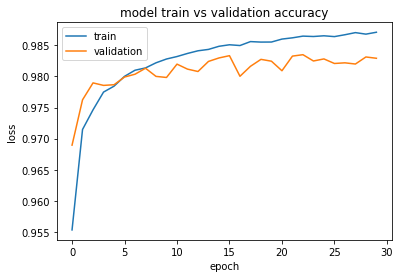

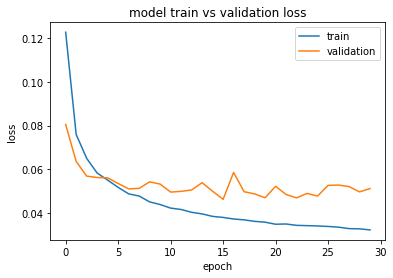

In [ ]:
from matplotlib import pyplot

pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model train vs validation accuracy')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'])
pyplot.show()

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'])
pyplot.show()